# Performing Dimentionality reduction and Feature selection using Allele frequency conservation  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path

In [2]:
def one_hot_encoding_dim_reduction(df_in,category):
    dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
    snp_data = df_in.drop(columns=dropped_columns)
    print(f"The initial features are {df_in.shape[1]}")
    encoded_categorical=pd.get_dummies(snp_data,dtype=int)
    print(f"The initial features  after one hot encoding are {encoded_categorical.shape[1]}")

    # Calculate the frequency of 1 for each SNP column
    column_frequencies = encoded_categorical.mean()
    # Set a threshold for high conservation
    conservation_threshold = 0.9
    # Identify highly conserved SNP loci
    highly_conserved_loci = column_frequencies[column_frequencies > conservation_threshold]
    # Remove columns containing '_N' from highly conserved loci
    highly_conserved_filtered = highly_conserved_loci[highly_conserved_loci.index.str.contains('_N') == False]
    # Get DataFrame with the filtered columns
    filtered_columns = highly_conserved_filtered.index.tolist()
    df_filtered = encoded_categorical[filtered_columns]
    df_filtered 
    # Select informative SNP columns
    # Combine non-categorical variables with informative SNP columns
    data_combined = pd.concat([df_in[dropped_columns], df_filtered], axis=1)
    # Get the top ten conserved alleles
    data_combined.to_csv(f"{category}.csv",index=False)
    top_ten_conserved = df_filtered.mean().nlargest(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_ten_conserved.plot(kind='bar', color='blue')
    plt.title(f"Top Ten Conserved SNP's in {category}")
    plt.xlabel('Allele')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot as a PNG file
    plt.savefig(f'../../../salmonellaml/salmonellaml/figures/top_ten_conserved_SNP_{category}.png')
    plt.show()
    return data_combined

In [153]:
# load data
df=pd.read_csv("../data/nigeria_poultry_metadata.csv")
df

,Isolation source,category,BioSample,sra_accession,country,27,40,576,646,681,...,4486464,4745998,4746010,4746025,4746046,4746058,4746064,4746067,4746068,4746070
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,N,N,N,T,C,...,N,N,N,N,N,N,N,N,N,N
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,A,A,A,T,C,...,N,N,N,N,N,N,N,N,N,N
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,N,N,N,T,N,...,N,N,N,N,N,N,N,N,N,N


The initial features are 245904
The initial features  after one hot encoding are 499774


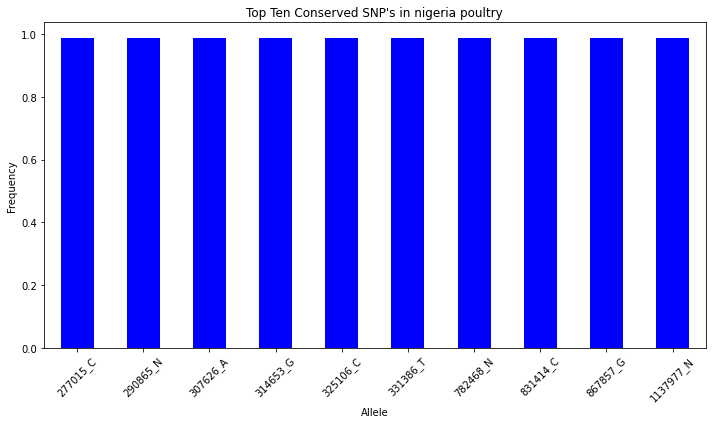

,Isolation source,category,BioSample,sra_accession,country,40_N,1647_C,2088_G,2136_N,2493_G,...,4486464_N,4745998_N,4746010_N,4746025_N,4746046_N,4746058_N,4746064_N,4746067_N,4746068_N,4746070_N
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Poultry vendoors and farms,poultry,SAMEA6869863,ERR4183583,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81,Poultry vendoors and farms,poultry,SAMEA6869865,ERR4183585,nigeria,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
82,Poultry vendoors and farms,poultry,SAMEA6869866,ERR4183586,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [154]:
df_poultry=one_hot_encoding_dim_reduction(df,"nigeria poultry")
df_poultry

In [4]:
df=pd.read_csv("./nigeria poultry.csv")
df_poulty=df.drop(columns=["Unnamed: 0"])

In [5]:
# load data
# df_pig=pd.read_csv("../data/nigeria_pig_metadata.csv")
df_pig=pd.read_csv("./nigeria pig.csv")
df_pig=df_pig.drop(columns=["Unnamed: 0"])
df_pig

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,2955753_C,2955769_C,3113583_A,3155847_G,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


The initial features are 297317
The initial features  after one hot encoding are 606544


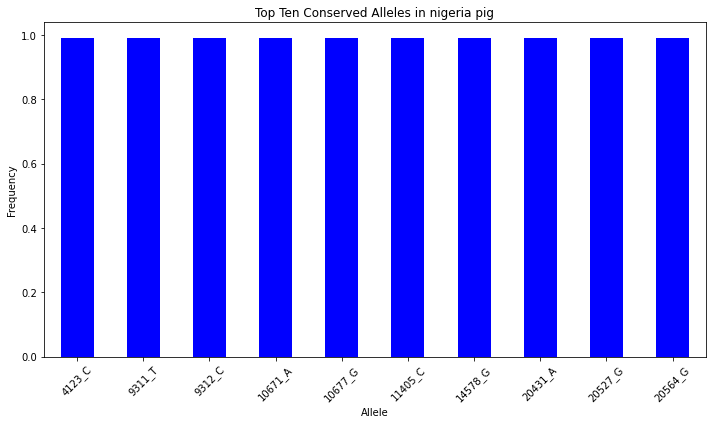

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,2955753_C,2955769_C,3113583_A,3155847_G,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,pig stool,swine,SAMN07135307,SRR6950097,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,pig stool,swine,SAMN07135306,SRR6950133,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,pig stool,swine,SAMN07135305,SRR6950194,nigeria,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,pig stool,swine,SAMN07135304,SRR6950215,nigeria,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pig stool,swine,SAMN07135293,SRR6950217,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
df_pig=one_hot_encoding_dim_reduction(df_pig,"nigeria pig")
df_pig

In [6]:
df_bovine=pd.read_csv("nigeria bovine.csv")
df_bovine=df_bovine.drop(columns=["Unnamed: 0"])
df_bovine

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1647_C,2088_G,2493_G,...,4844535_C,4856784_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3577698_T,3732615_A
0,cattle stool (Bos taurus),bovine,SAMN07163935,SRR5627235,nigeria,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1,cattle stool (Bos taurus),bovine,SAMN07163938,SRR5627238,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,cattle stool (Bos taurus),bovine,SAMN07163941,SRR5627163,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,cattle stool (Bos taurus),bovine,SAMN07163937,SRR5627236,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
4,cattle stool (Bos taurus),bovine,SAMN07163936,SRR5627241,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,beef,bovine,SAMN31852854,SRR22395760,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
100,beef,bovine,SAMN31852864,SRR22395764,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
101,beef,bovine,SAMN31852862,SRR22395766,nigeria,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
102,beef,bovine,SAMN31852861,SRR22395767,nigeria,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


In [159]:
# df_bovine=one_hot_encoding_dim_reduction(df_bovine,"nigeria bovine")
# df_bovine

In [ ]:
# Identify columns that are in one category that are not in another one

In [31]:
# Find unique columns in both DataFrames
unique_columns_poultry = list(set(df_poultry.columns) ^ set(df_pig.columns))
unique_columns_poultry

['60339_C',
 '1993049_A',
 '3918057_C',
 '2106554_C',
 '3016958_T',
 '276427_G',
 '4768228_G',
 '1917490_T',
 '2645170_G',
 '2527487_A',
 '4393336_C',
 '4111383_G',
 '2930280_G',
 '3516946_C',
 '4489488_C',
 '2828170_G',
 '3860838_G',
 '3634608_A',
 '3653679_C',
 '3403628_G',
 '2594560_G',
 '1741440_A',
 '769596_G',
 '256720_C',
 '1303010_G',
 '3816518_A',
 '1405051_G',
 '2268126_C',
 '1457739_A',
 '3408998_G',
 '3270468_C',
 '1791747_C',
 '4500936_T',
 '3941797_C',
 '3477127_G',
 '1877784_C',
 '4264066_G',
 '193298_C',
 '4244438_G',
 '3836000_G',
 '2425031_G',
 '2569472_G',
 '67382_C',
 '921130_A',
 '1492080_T',
 '1981783_C',
 '2670304_T',
 '90342_G',
 '3847115_C',
 '3339040_C',
 '545389_G',
 '447166_C',
 '2406940_T',
 '4755955_G',
 '3149817_G',
 '1191586_C',
 '4853889_G',
 '1744584_T',
 '174037_G',
 '2023261_G',
 '3273488_A',
 '4227751_G',
 '951899_C',
 '4063936_G',
 '1451169_A',
 '2838691_G',
 '3538986_G',
 '1285860_G',
 '3840160_A',
 '1384352_C',
 '1468491_C',
 '709248_G',
 '323527

In [32]:
unique_columns_pig = list(set(df_pig.columns) ^ set(df_poultry.columns))
unique_columns_pig

['60339_C',
 '1993049_A',
 '4768228_G',
 '276427_G',
 '1917490_T',
 '2645170_G',
 '2527487_A',
 '2930280_G',
 '3516946_C',
 '2828170_G',
 '3634608_A',
 '3653679_C',
 '256720_C',
 '1303010_G',
 '2268126_C',
 '1457739_A',
 '3408998_G',
 '3270468_C',
 '3941797_C',
 '3477127_G',
 '1877784_C',
 '193298_C',
 '4244438_G',
 '3836000_G',
 '67382_C',
 '921130_A',
 '1492080_T',
 '1981783_C',
 '2670304_T',
 '3339040_C',
 '447166_C',
 '3149817_G',
 '1744584_T',
 '2023261_G',
 '3273488_A',
 '951899_C',
 '1451169_A',
 '3538986_G',
 '1384352_C',
 '709248_G',
 '3705046_G',
 '2716708_T',
 '2478621_A',
 '1563426_C',
 '3292875_C',
 '4059825_G',
 '3390282_G',
 '2271178_G',
 '620132_C',
 '1242244_A',
 '1012360_T',
 '2554900_T',
 '2470448_A',
 '2550616_C',
 '1862790_C',
 '420331_C',
 '4130838_C',
 '428412_T',
 '2606375_G',
 '2580857_C',
 '1241173_C',
 '3690082_A',
 '1225236_C',
 '2620717_T',
 '694241_T',
 '4118427_T',
 '3254608_T',
 '2394895_A',
 '1207487_A',
 '2490693_A',
 '1209421_G',
 '3446519_A',
 '44895

In [35]:
# Find common columns in both DataFrames
common_columns = list(set(df_poultry.columns) & set(df_pig.columns))
print("Common columns:", len(common_columns))

Common columns: 1166


In [76]:
#common columns
# common_columns = set(df1.columns) & set(df2.columns) & set(df3.columns)
common_columns = set(df_poultry.columns) & set(df_pig.columns)  & set(df_bovine.columns)
common_columns
# # Initialize a list to store columns to drop
columns_to_drop = []

# Check if the SNP values are the same in all dataframes
for col in common_columns:
    if all(df_poultry[col].isin([0, 1])) and all(df_pig[col].isin([0, 1]))  and all(df_bovine[col].isin([0, 1])) :
        if not (df_poultry[col].nunique() == 1 or df_pig[col].nunique() == 1 or df_bovine[col].nunique() == 1):
            columns_to_drop.append(col)

# Drop the common columns with varying SNP values
df_poultry.drop(columns=columns_to_drop, inplace=True)
df_pig.drop(columns=columns_to_drop, inplace=True)
df_bovine.drop(columns=columns_to_drop, inplace=True)

In [63]:
len(common_columns)

930

In [8]:
df_all=pd.concat([df_poulty,df_bovine,df_pig])
df_all

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,2493_G,3982_G,7166_A,...,187701_C,1073652_T,2955753_C,2955769_C,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1.0,1.0,1,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,NaN,NaN,1,1,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
df_all=df_all.fillna(0)

In [12]:
df_all_dropped=df_all.drop(columns=dropped_columns)
# Calculate the correlation matrix
correlation_matrix = df_all_dropped.corr()

# Find pairs of highly correlated columns
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the highly correlated pairs
for pair in highly_correlated_pairs:
    print(f"Highly correlated columns: {pair[0]} and {pair[1]}")

# Drop one column from each highly correlated pair
columns_to_drop = set()

for pair in highly_correlated_pairs:
    columns_to_drop.add(pair[1])

df_cleaned = df_all_dropped.drop(columns=columns_to_drop)

print("\nDataFrame after dropping highly correlated columns:")
df_cleaned


KeyboardInterrupt



# Feature selection

In [25]:
# Feature selection
import numpy as np
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
X = df_all.drop(columns=dropped_columns)
y = df_all['category']

# One-hot encode the target variable y
y_encoded = pd.get_dummies(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Convert one-hot encoded predictions back to categorical labels
y_pred_labels = y_encoded.columns[y_pred.argmax(axis=1)]

# Calculate accuracy
accuracy = accuracy_score(y_test.idxmax(axis=1), y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.98


NameError: name 'features' is not defined

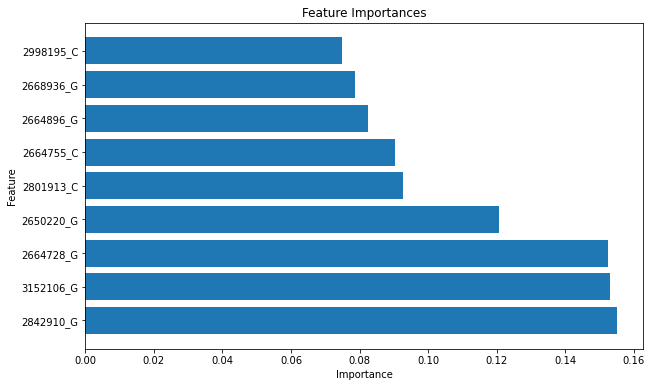

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with the classifier and cross-validation settings
rfecv = RFECV(estimator=clf, step=1, cv=5)  # You can adjust step and cv as needed

# Fit RFECV to your training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Train the Random Forest classifier on the selected features
clf.fit(X_train[selected_features], y_train)

# Get feature importances from the trained classifier
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [27]:
selected_features

Index(['2650220_G', '2664728_G', '2664755_C', '2664896_G', '2668936_G',
       '2801913_C', '2842910_G', '2998195_C', '3152106_G'],
      dtype='object')

In [80]:
df_modified=df_all.fillna(0)

In [81]:
df_modified

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,7166_A,7505_C,9673_G,...,187701_C,1073652_T,2955753_C,2955769_C,3918057_C,3918075_G,3918081_G,3918120_A,4846602_G,3304610_C
0,Poultry small intenstine,poultry,SAMN02368689,SRR1106403,nigeria,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chicken,poultry,SAMN02368684,SRR1840690,nigeria,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken,poultry,SAMN02368666,SRR1106413,nigeria,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chicken,poultry,SAMN02368627,SRR1106442,nigeria,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chicken,poultry,SAMN02368606,SRR1106456,nigeria,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pig stool,swine,SAMN07135187,SRR7763516,nigeria,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
87,pig stool,swine,SAMN07135188,SRR7763517,nigeria,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
88,pig stool,swine,SAMN09929385,SRR7763447,nigeria,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
89,pig stool,swine,SAMN09929405,SRR7763451,nigeria,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [82]:
df_modified.to_csv("training_data_encoded.csv")

In [64]:
common_columns

{'10137_C',
 '1028138_C',
 '1033020_C',
 '1034119_G',
 '1062752_T',
 '1069517_C',
 '1069567_C',
 '1073650_C',
 '1076481_G',
 '1081090_A',
 '1083961_G',
 '1180629_T',
 '1184788_G',
 '1185807_G',
 '1187334_T',
 '119094_G',
 '1192406_T',
 '1194263_C',
 '1194739_A',
 '1201461_A',
 '1235233_G',
 '1235542_A',
 '1235560_G',
 '1235571_T',
 '1236475_T',
 '1244451_A',
 '1266681_C',
 '1282760_C',
 '1317567_C',
 '1336820_A',
 '1341382_C',
 '1341744_A',
 '1344529_C',
 '1344622_C',
 '1351318_G',
 '1351378_G',
 '1371718_G',
 '1374419_G',
 '1375149_A',
 '1377973_G',
 '1378279_G',
 '1378333_A',
 '1383395_C',
 '1389198_G',
 '1389264_G',
 '1393642_A',
 '1394336_C',
 '1405420_G',
 '1405804_C',
 '1407003_A',
 '1407493_G',
 '142082_G',
 '1429596_C',
 '143024_G',
 '1432942_G',
 '1434030_C',
 '1434357_C',
 '1434998_G',
 '1436098_A',
 '1439477_G',
 '1440068_G',
 '1440843_G',
 '1440909_A',
 '1441703_G',
 '144177_C',
 '1443914_C',
 '1444249_T',
 '1452926_C',
 '1455267_A',
 '1455351_C',
 '1455550_A',
 '14578_G',


In [68]:
df_bovine["1647_C"].value_counts()

1647_C
1    101
0      3
Name: count, dtype: int64

In [3]:
import pandas as pd
df1=pd.read_csv("./nigeria pig.csv")
df1
df2=pd.read_csv("./nigeria poultry.csv")
df3=pd.read_csv("./nigeria bovine.csv")
df_all_trial=pd.concat([df1,df2,df3])
df_all_trial=df_all_trial.drop(columns="Unnamed: 0").fillna(0)
df_all_trial
# Shuffle the rows
shuffled_df = df_all_trial.sample(frac=1).reset_index(drop=True)
shuffled_df

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,pig stool,swine,SAMN07135270,SRR6950903,nigeria,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pig stool,swine,SAMN07135230,SRR6950999,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken liver,poultry,SAMN11897888,SRR9165260,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Poultry carcass,poultry,SAMEA6848052,ERR4181906,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Poultry carcass,poultry,SAMEA6848044,ERR4181898,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,pig stool,swine,SAMN07135155,SRR7763499,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,stool (Bos taurus),bovine,SAMN07774653,SRR9200758,nigeria,1.0,1.0,0.0,0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
277,cattle stool (Bos taurus),bovine,SAMN07162990,SRR5598927,nigeria,1.0,1.0,0.0,1,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df1=pd.read_csv("./nigeria pig.csv")

In [5]:
# load data
df_kenya=pd.read_csv("./kenya_processed.csv")
df_kenya

,Unnamed: 0.1,BioSample,Isolation source,sra_accession,Unnamed: 0,country,15,27,78,480,...,4839562,4841514,4841563,4843995,4851006,4853017,4855381,20462,65978,2914287
0,0,SAMN03576958,feces swine,SRR2163243,51,kenya,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,1,SAMN03576962,feces swine,SRR2163246,52,kenya,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,2,SAMN03576963,feces swine,SRR2163247,53,kenya,N,A,N,G,...,N,N,N,N,N,N,N,N,N,N
3,3,SAMN03576956,feces swine,SRR2163254,54,kenya,T,A,N,G,...,N,N,N,N,N,N,N,N,N,N
4,4,SAMN03576959,feces swine,SRR2163255,55,kenya,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,SAMN03577020,feces swine,SRR2981160,116,kenya,N,A,N,G,...,N,N,N,N,N,N,N,N,N,N
69,69,SAMN03577015,feces swine,SRR2981161,117,kenya,N,N,N,G,...,N,N,N,N,N,N,N,N,N,N
70,70,SAMN03577005,feces swine,SRR2981162,118,kenya,N,A,N,G,...,N,N,N,N,N,N,N,N,N,N
71,71,SAMN03577026,feces swine,SRR3272062,119,kenya,N,N,N,G,...,N,N,N,N,N,N,N,N,N,N


In [8]:
def category_allocation(df_data):
    # List of terms related to various categories
    bovine_terms = ['cattle stool','stool (Bos taurus)','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
    poultry_terms = ['poultry feed', 'Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
                     'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water']
    swine_terms=["feces swine","swine","swine stool","pig stool"]

    # Create the dictionary for replacement
    replacement_dict = {}
    for term in bovine_terms:
        replacement_dict[term] = 'bovine'
    for term in poultry_terms:
        replacement_dict[term] = 'poultry'
    for term in swine_terms:
        replacement_dict[term] = 'swine'

    # Function to replace terms based on the dictionary
    def replace_terms(description):
        for term, replacement in replacement_dict.items():
            if term in description:
                return replacement
        return description

    # Create the 'category' column using apply
    df_data['category'] = df_data['Isolation source'].apply(replace_terms)

    # Reorder the columns to insert 'category' as the second column
    column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
    df_new = df_data[column_order]

    return df_new

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Categorize isolation sources in a DataFrame")
    parser.add_argument("--input_file", required=True, help="Path to the input CSV file")
    parser.add_argument("--output_file", required=True, help="Path to the output CSV file")

    args = parser.parse_args()

    input_file_path = args.input_file
    output_file_path = args.output_file

    # Read the input CSV file into a DataFrame
    df_data = pd.read_csv(input_file_path)

    # Call the category_allocation function
    categorized_df = category_allocation(df_data)

    # Save the categorized DataFrame to the output CSV file
    categorized_df.to_csv(output_file_path, index=False)

In [13]:
df_k=category_allocation(df_kenya)
df_k=df_k.drop(columns=["Unnamed: 0","Unnamed: 0.1"])
df_k

,Isolation source,category,BioSample,sra_accession,country,15,27,78,480,504,...,4839562,4841514,4841563,4843995,4851006,4853017,4855381,20462,65978,2914287
0,feces swine,swine,SAMN03576958,SRR2163243,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,feces swine,swine,SAMN03576962,SRR2163246,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,feces swine,swine,SAMN03576963,SRR2163247,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
3,feces swine,swine,SAMN03576956,SRR2163254,kenya,T,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
4,feces swine,swine,SAMN03576959,SRR2163255,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,feces swine,swine,SAMN03577020,SRR2981160,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
69,feces swine,swine,SAMN03577015,SRR2981161,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
70,feces swine,swine,SAMN03577005,SRR2981162,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
71,feces swine,swine,SAMN03577026,SRR3272062,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N


The initial features are 317597
The initial features  after one hot encoding are 499406


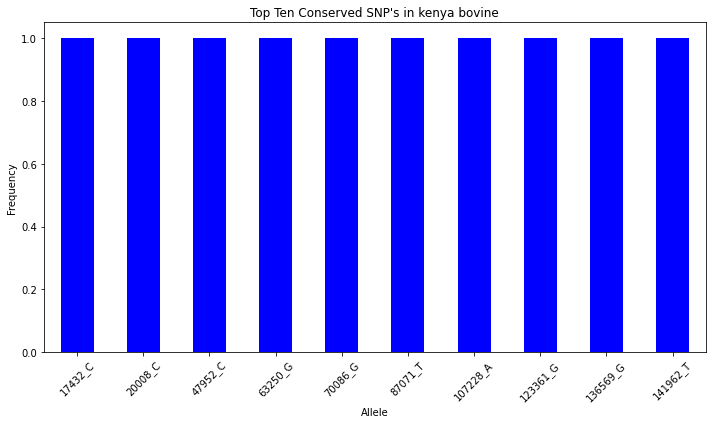

,Isolation source,category,BioSample,sra_accession,country,1647_C,2088_G,3982_G,5014_G,7166_A,...,2501340_C,2668846_G,2957530_A,3156755_A,3182345_G,3669131_G,4147189_C,4174741_G,4189827_C,4392637_A
0,feces swine,swine,SAMN03576958,SRR2163243,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,feces swine,swine,SAMN03576962,SRR2163246,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,feces swine,swine,SAMN03576963,SRR2163247,kenya,1,1,1,1,1,...,1,0,1,1,1,0,0,0,1,1
3,feces swine,swine,SAMN03576956,SRR2163254,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,feces swine,swine,SAMN03576959,SRR2163255,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,feces swine,swine,SAMN03577020,SRR2981160,kenya,1,0,1,1,1,...,1,1,1,0,1,1,1,1,0,1
69,feces swine,swine,SAMN03577015,SRR2981161,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
70,feces swine,swine,SAMN03577005,SRR2981162,kenya,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
71,feces swine,swine,SAMN03577026,SRR3272062,kenya,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
df_k=one_hot_encoding_dim_reduction(df_k,"kenya bovine")
df_k

In [152]:
missing= []
for i in list(df_k.columns):
    if i not in list(X.columns) and i not in dropped_columns:
        missing.append(i)
X_valid=df_k.drop(columns=dropped_columns)
# Merge the DataFrames
X_valid = X_valid.drop(columns=missing).fillna(0)
# Identify missing columns
colg = [col for col in X.columns if col not in df_k.columns]

# Add missing columns to df_k with all values as 0
for col in colg:
    df_k[col] = 0

# Reorder columns in df_k to match the order in X
X_valid = df_k[X.columns]
# Reorder columns in the merged DataFrame to match the order in df1
# merged_df = merged_df[X.columns]
X_valid


KeyboardInterrupt: 

In [140]:
X_valid

,534_C,1242_T,1410_C,2493_G,2607_G,3982_G,4123_C,4294_T,4882_A,6239_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
69,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
70,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
71,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


In [46]:
shuffled_df

,Isolation source,category,BioSample,sra_accession,country,534_C,1242_T,1410_C,2493_G,2607_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,pig stool,swine,SAMN07135270,SRR6950903,nigeria,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pig stool,swine,SAMN07135230,SRR6950999,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chicken liver,poultry,SAMN11897888,SRR9165260,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Poultry carcass,poultry,SAMEA6848052,ERR4181906,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Poultry vendoors and farms,poultry,SAMEA6869864,ERR4183584,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Poultry carcass,poultry,SAMEA6848044,ERR4181898,nigeria,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,pig stool,swine,SAMN07135155,SRR7763499,nigeria,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,stool (Bos taurus),bovine,SAMN07774653,SRR9200758,nigeria,1.0,1.0,0.0,0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
277,cattle stool (Bos taurus),bovine,SAMN07162990,SRR5598927,nigeria,1.0,1.0,0.0,1,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [132]:
y_valid = df_k['category']  # Change 'target' to the appropriate column name


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Assuming you have a target column named 'target'
dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']

X = df_poultry.drop(columns=dropped_columns)
y = df_poultry['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initialize and train a random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

NameError: name 'df_poultry' is not defined

In [47]:
from sklearn.model_selection import cross_val_score

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
mean_accuracy = scores.mean()

print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2f}")


,534_C,1242_T,1410_C,2493_G,2607_G,3982_G,4123_C,4294_T,4882_A,6239_G,...,4305186_G,4521752_A,4730977_C,184314_G,387554_A,387622_G,387658_G,391456_C,1682255_C,3732615_A
0,1.0,1.0,0.0,1,1.0,1,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1,1.0,1,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.0,0.0,0.0,1,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,1.0,1.0,1.0,1,1.0,1,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,1.0,1.0,0.0,0,1.0,1,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
277,1.0,1.0,0.0,1,1.0,1,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [151]:
# Predict on the validation set
y_pred_valid = rf_classifier.predict(X_valid)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.2f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 1005648_G
- 1005691_G
- 1006058_C
- 1006808_G
- 1007068_G
- ...
Feature names seen at fit time, yet now missing:
- 100001_N
- 1000155_N
- 1000162_N
- 1000167_N
- 100016_N
- ...


In [145]:
y_pred_valid

array(['bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine', 'bovine', 'bovine', 'bovine', 'bovine', 'bovine',
       'bovine'], dtype=object)

In [137]:
X_valid.shape

(352, 10125)

In [134]:
y_valid

0     swine
1     swine
2     swine
3     swine
4     swine
      ...  
68    swine
69    swine
70    swine
71    swine
72    swine
Name: category, Length: 73, dtype: object

In [122]:
y_pred

array(['swine', 'swine', 'bovine', 'bovine', 'swine', 'swine', 'swine',
       'bovine', 'bovine', 'swine', 'bovine', 'bovine', 'swine', 'swine',
       'bovine', 'swine', 'bovine', 'swine', 'swine', 'poultry', 'bovine',
       'swine', 'poultry', 'bovine', 'poultry', 'poultry', 'swine',
       'swine', 'swine', 'poultry', 'bovine', 'bovine', 'bovine', 'swine',
       'swine', 'swine', 'poultry', 'swine', 'bovine', 'swine', 'poultry',
       'poultry', 'swine', 'swine', 'swine', 'swine', 'swine', 'poultry',
       'poultry', 'swine', 'swine', 'poultry', 'swine', 'poultry',
       'swine', 'bovine', 'poultry', 'bovine', 'swine', 'poultry',
       'poultry', 'bovine', 'poultry', 'poultry', 'poultry', 'poultry',
       'bovine', 'bovine', 'bovine', 'bovine'], dtype=object)

In [134]:
y_test

202      swine
223    poultry
5      poultry
3       bovine
262    poultry
        ...   
160     bovine
132      swine
276    poultry
168     bovine
241      swine
Name: category, Length: 70, dtype: object

In [127]:
from sklearn.svm import SVC
svm_model = SVC()  # You can choose different kernels (linear, polynomial, radial basis function, etc.)
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [83]:
df_modified["category"].value_counts()

category
bovine     104
swine       91
poultry     84
Name: count, dtype: int64